In [8]:
from adversarial_attack.mnist_model import load_pretrained_model, load_mnist_data
from adversarial_attack.generate import generate_adversarial
import matplotlib.pyplot as plt

model = load_pretrained_model('models/base_fc.pth').to('cuda')
train_loader, test_loader = load_mnist_data()

test_iter = iter(test_loader)
test_image, _ = next(test_iter)

Text(0.5, 1.0, 'Adversarial Pred 6')

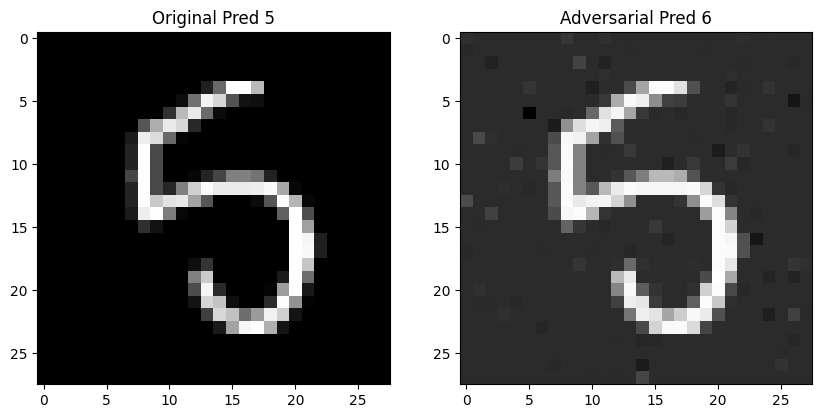

In [9]:
import yaml
from types import SimpleNamespace
import wandb
wandb.init(mode="disabled")

fig = plt.figure(figsize=(10, 7))

sample_image = test_image[0].to('cuda')
fig.add_subplot(1, 2, 1)
original_pred = model(sample_image).argmax(dim=1).item()

plt.imshow(sample_image.squeeze(dim=0).cpu(), cmap='gray')
plt.title(f'Original Pred {original_pred}')

config_dict = yaml.safe_load(open("hyper-parameters/hyperparameter.yaml"))
config = SimpleNamespace(**config_dict)
adversarial_image = generate_adversarial(model, sample_image, config = config)
adversarial_pred = model(adversarial_image).argmax(dim=1).cpu().item()

fig.add_subplot(1, 2, 2)
plt.imshow(adversarial_image[0].cpu(), cmap='gray')
plt.title(f'Adversarial Pred {adversarial_pred}')